# **1. 데이터 로더(Data Loader)**

* 데이터양이 많을 때 배치 단위로 학습하는 방법을 제공

<center><img src='https://i.imgur.com/t83RUtL.png' width='700'></center>

# **2. 손글씨 인식 모델 만들기**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

In [3]:
digits = load_digits()

X_data = digits['data']
y_data = digits['target']

print(X_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)


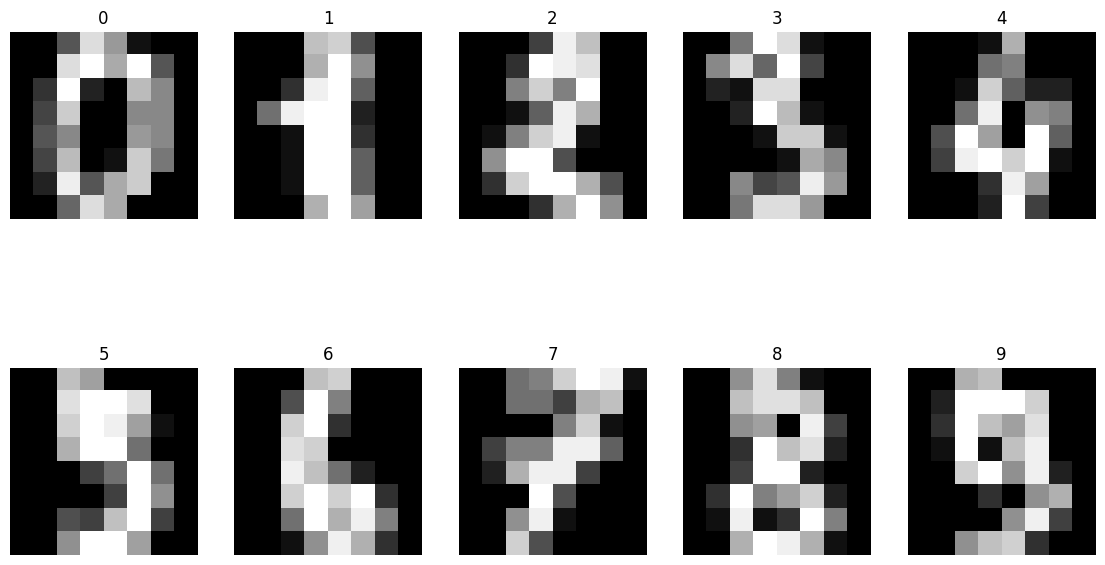

In [4]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (14, 8))

for i, ax in enumerate(axes.flatten()) :
    ax.imshow(X_data[i].reshape((8, 8)), cmap = 'gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [5]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size =0.2,
                                                    random_state = 2024)

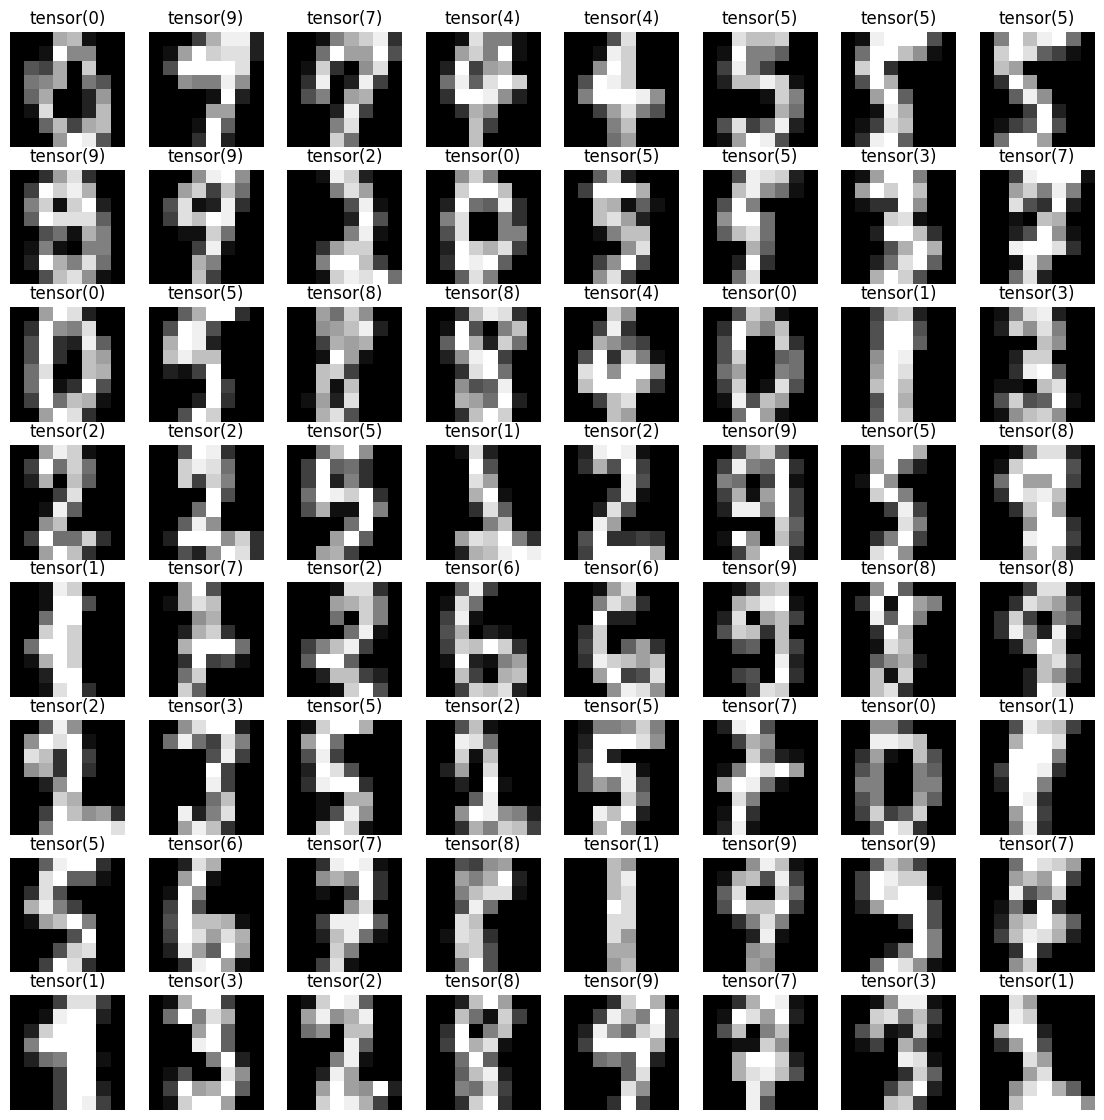

In [7]:
loader = torch.utils.data.DataLoader(
    dataset = list(zip(X_train, y_train)),
    batch_size = 64,
    shuffle = True,
    drop_last = False
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(nrows = 8, ncols = 8, figsize = (14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels) :
    ax.imshow(img.reshape((8, 8)), cmap = 'gray')
    ax.set_title(str(label))
    ax.axis('off')

In [8]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

In [10]:
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [14]:
epochs = 50

for epoch in range(epochs + 1) :
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader :
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_losses= sum_losses + loss
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis = 1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch : 4d} / {epochs} Loss : {avg_loss : .6f} accuracy : {avg_acc : .2f}%')

Epoch    0 / 50 Loss :  1.588033 accuracy :  61.09%
Epoch    1 / 50 Loss :  0.298839 accuracy :  90.12%
Epoch    2 / 50 Loss :  0.192407 accuracy :  94.02%
Epoch    3 / 50 Loss :  0.136204 accuracy :  95.84%
Epoch    4 / 50 Loss :  0.117018 accuracy :  96.67%
Epoch    5 / 50 Loss :  0.098343 accuracy :  96.73%
Epoch    6 / 50 Loss :  0.092701 accuracy :  97.12%
Epoch    7 / 50 Loss :  0.081784 accuracy :  97.61%
Epoch    8 / 50 Loss :  0.087341 accuracy :  96.97%
Epoch    9 / 50 Loss :  0.077405 accuracy :  97.61%
Epoch   10 / 50 Loss :  0.059932 accuracy :  98.57%
Epoch   11 / 50 Loss :  0.047611 accuracy :  99.10%
Epoch   12 / 50 Loss :  0.041213 accuracy :  99.32%
Epoch   13 / 50 Loss :  0.060545 accuracy :  98.02%
Epoch   14 / 50 Loss :  0.052096 accuracy :  98.64%
Epoch   15 / 50 Loss :  0.036256 accuracy :  98.97%
Epoch   16 / 50 Loss :  0.033408 accuracy :  99.25%
Epoch   17 / 50 Loss :  0.031847 accuracy :  99.46%
Epoch   18 / 50 Loss :  0.033509 accuracy :  99.25%
Epoch   19 /

tensor(7)


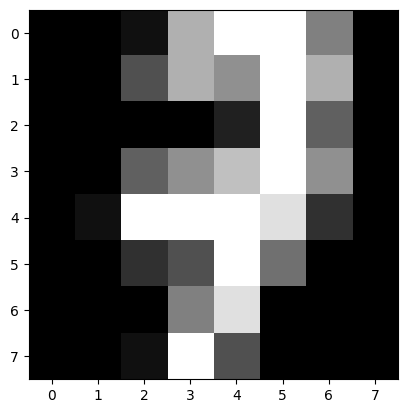

In [17]:
plt.imshow(X_test[10].reshape((8, 8)), cmap = 'gray')

print(y_test[10])

In [19]:
y_pred = model(X_test)
y_pred[10]

tensor([ -3.6797,  -0.6679,  -7.9642,  -0.1154,   2.8941,  -3.1728, -11.8323,
         15.5642,   0.4989,   6.4870], grad_fn=<SelectBackward0>)

In [20]:
y_prob = nn.Softmax(1)(y_pred)

y_prob[10]

tensor([4.3894e-09, 8.9211e-08, 6.0491e-11, 1.5502e-07, 3.1434e-06, 7.2871e-09,
        1.2642e-12, 9.9988e-01, 2.8654e-07, 1.1423e-04],
       grad_fn=<SelectBackward0>)

In [21]:
for i in range(10) :
    print(f'숫자 {i}일 확률 ; {y_prob[0][i] : .2f}')

숫자 0일 확률 ;  0.00
숫자 1일 확률 ;  0.00
숫자 2일 확률 ;  0.00
숫자 3일 확률 ;  0.03
숫자 4일 확률 ;  0.00
숫자 5일 확률 ;  0.00
숫자 6일 확률 ;  0.00
숫자 7일 확률 ;  0.00
숫자 8일 확률 ;  0.97
숫자 9일 확률 ;  0.00


In [22]:
y_pred_index = torch.argmax(y_prob, axis = 1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100

print(f'테스트 정확도는 {accuracy : .2f}% 입니다.')

테스트 정확도는  96.39% 입니다.
